# Modul

## Fungsi-fungsi *plotting*

Jangan mengubah kode pada *cell* di bawah ini.

In [1]:
import matplotlib.pyplot as plt
import numpy as np


def line(w, th=0):
    w2 = w[2] + .001 if w[2] == 0 else w[2]

    return lambda x: (th - w[1] * x - w[0]) / w2


def plot(func, X, target, padding=1):
    X = np.array(X)

    x_vals, y_vals = X[:, 1], X[:, 2]
    xmin, xmax, ymin, ymax = x_vals.min(), x_vals.max(), y_vals.min(), y_vals.max()

    color = 'ro', 'bo'
    line_x = np.arange(xmin-padding-1, xmax+padding+1)

    for c, v in enumerate(np.unique(target)):
        p = X[np.where(target == v)]

        plt.plot(p[:,1], p[:,2], color[c])

    plt.axis([xmin-padding, xmax+padding, ymin-padding, ymax+padding])
    plt.plot(line_x, func(line_x))
    plt.show()

## Praktikum

### a) Fungsi *step* Bipolar

Tulis kode ke dalam *cell* di bawah ini:

In [2]:
def bipstep(y, th=0):
  return 1 if y >= th else -1

### b) Fungsi *training* Hebb

Tulis kode ke dalam *cell* di bawah ini:

In [3]:
def hebb_fit(train, target, verbose=False, draw=False,
draw_padding=1):
  w = np.zeros(len(train[0]) + 1)
  bias = np.ones((len(train), 1))
  train = np.hstack((bias, train))
  for r, row in enumerate(train):
    w = [w[i] + row[i] * target[r] for i in range(len(row))]
    if verbose:
      print('Bobot:', w)
    if draw:
      plot(line(w, 0), train, target, draw_padding)

  return w

### c) Fungsi *testing* Hebb

Tulis kode ke dalam *cell* di bawah ini:

In [4]:
def hebb_predict(X, w):
  Y = []
  for x in X:
    y_in = w[0] + np.dot(x, w[1:])
    y = bipstep(y_in)
    Y.append(y)
  return Y

### d) Fungsi Hitung Akurasi

In [5]:
def calc_accuracy(a, b):
  s = [1 if a[i] == b[i] else 0 for i in range(len(a))]
  return sum(s) / len(a)

# Soal

Gunakan dataset "Healthcare-Diabetes.csv" yang telah dilampirkan

Soal yang diajukan:
1. Gunakan baris data ke-26 sampai ke-30

## Import data

In [8]:
from google.colab import files
kontak = files.upload()
for fn in kontak.keys():
  print('Nama file "{name}" dengan panjang {length} bytes'.format(
      name=fn, length=len(kontak[fn])))

Saving Healthcare-Diabetes.csv to Healthcare-Diabetes.csv
Nama file "Healthcare-Diabetes.csv" dengan panjang 98571 bytes


In [14]:
import pandas as pd

data = pd.read_csv('Healthcare-Diabetes.csv')
data.head = data.iloc[25:30]
print(data.head)

    Id  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
25  26           10      125             70             26      115  31.1   
26  27            7      147             76              0        0  39.4   
27  28            1       97             66             15      140  23.2   
28  29           13      145             82             19      110  22.2   
29  30            5      117             92              0        0  34.1   

    DiabetesPedigreeFunction  Age  Outcome  
25                     0.205   41        1  
26                     0.257   43        1  
27                     0.487   22        0  
28                     0.245   57        0  
29                     0.337   38        0  


## Preprocess

In [15]:
data = pd.read_csv('Healthcare-Diabetes.csv')
data['Outcome'] = data['Outcome'].replace({0: -1}) #diisi praktikan => rubah nilai kolom Outcome, 1 tetap 1, 0 jadi -1

data.head = data.iloc[25:30]
print(data.head)

    Id  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
25  26           10      125             70             26      115  31.1   
26  27            7      147             76              0        0  39.4   
27  28            1       97             66             15      140  23.2   
28  29           13      145             82             19      110  22.2   
29  30            5      117             92              0        0  34.1   

    DiabetesPedigreeFunction  Age  Outcome  
25                     0.205   41        1  
26                     0.257   43        1  
27                     0.487   22       -1  
28                     0.245   57       -1  
29                     0.337   38       -1  


## Pengujian

Bobot: [1.0, 10.0, 125.0, 70.0, 26.0, 115.0, 31.1, 0.205, 41.0]


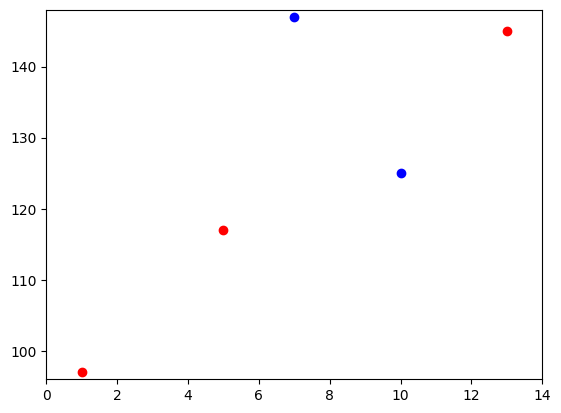

Bobot: [2.0, 17.0, 272.0, 146.0, 26.0, 115.0, 70.5, 0.46199999999999997, 84.0]


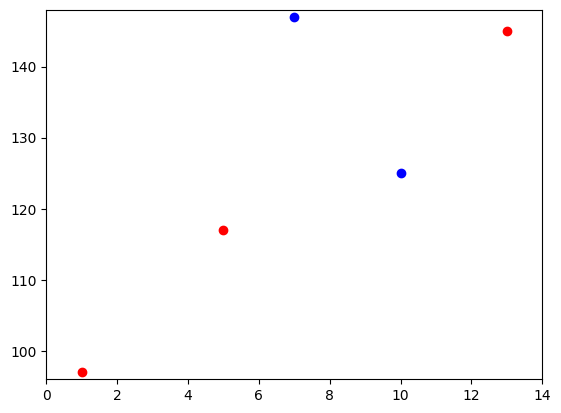

Bobot: [1.0, 16.0, 175.0, 80.0, 11.0, -25.0, 47.3, -0.025000000000000022, 62.0]


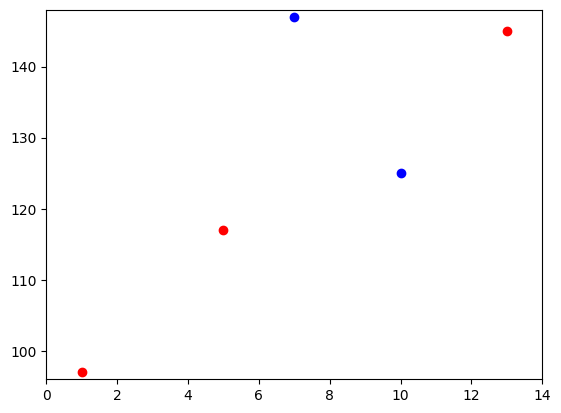

Bobot: [0.0, 3.0, 30.0, -2.0, -8.0, -135.0, 25.099999999999998, -0.27, 5.0]


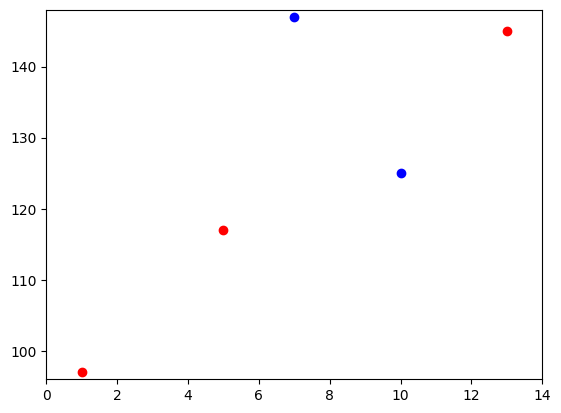

Bobot: [-1.0, -2.0, -87.0, -94.0, -8.0, -135.0, -9.000000000000004, -0.607, -33.0]


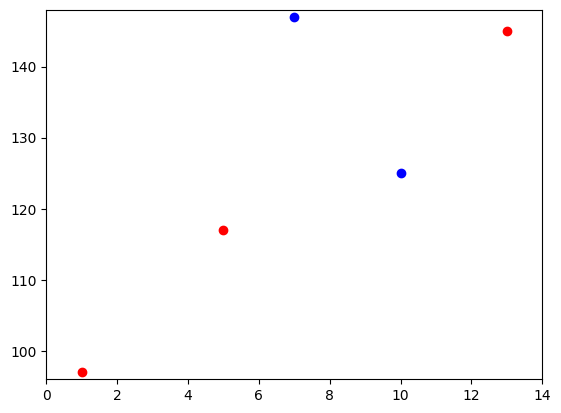

Output: [-1, -1, -1, -1, -1]
Target: [ 1  1 -1 -1 -1]
Accuracy: 0.6


In [18]:
#isilah array train oleh praktikan berdasarkan nilai data pada baris data ke-26 sampai ke-30
train = np.array([
    [10, 125, 70, 26, 115, 31.1, 0.205, 41],
    [7, 147, 76, 0, 0, 39.4, 0.257, 43],
    [1, 97, 66, 15, 140, 23.2, 0.487, 22],
    [13, 145, 82, 19, 110, 22.2, 0.245, 57],
    [5, 117, 92, 0, 0, 34.1, 0.337, 38]
])

#isilah array target oleh praktikan berdasarkan nilai data pada baris data ke-26 sampai ke-30
target = np.array([1, 1, -1, -1, -1])
model = hebb_fit(train, target, verbose=True, draw=True)
output = hebb_predict(train, model)
accuracy = calc_accuracy(output, target)

print('Output:', output)
print('Target:', target)
print('Accuracy:', accuracy)